In [44]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/supervised')

import warnings
warnings.filterwarnings("ignore")

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('car_details_v4.csv')
df = df.assign(Age = lambda x: 2025 - x["Year"])
df1 = df[ 
  (df["Year"] > 2010) 
   & (df["Make"].isin(["BMW","Honda"])) 
    & (df["Seating Capacity"] == 5)
]

In [68]:
df = pd.read_csv('car_details_v4.csv')
df = df.assign(Age = lambda x: 2025 - x["Year"])
df5 = df[ 
  (df["Year"] > 2010)  
    & (df["Seating Capacity"] == 5)
    & (df["Fuel Type"].isin(["Petrol","Diesel"]))
]

df5.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,8
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,11
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,14
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,6
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,...,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0,8


In [69]:
df5["Fuel Type"].value_counts()


Fuel Type
Petrol    791
Diesel    701
Name: count, dtype: int64

In [75]:
X5=df5[['Make','Fuel Type', 'Transmission','Kilometer']]
y5=df5['Price']

from sklearn.model_selection import train_test_split
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.25,random_state=10)

from sklearn.preprocessing import LabelEncoder
fuel_encoder = LabelEncoder()
X5_train['Fuel Type']=fuel_encoder.fit_transform(X5_train['Fuel Type'])
X5_test['Fuel Type']=fuel_encoder.transform(X5_test['Fuel Type'])

trans_encoder = LabelEncoder()
X5_train['Transmission']=trans_encoder.fit_transform(X5_train['Transmission'])
X5_test['Transmission']=trans_encoder.transform(X5_test['Transmission'])


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

make_transformer = ColumnTransformer(transformers=[('one-hot1',OrdinalEncoder(dtype=int),["Make"])],remainder="passthrough",verbose=True)
X5_train = make_transformer.fit_transform(X5_train)
X5_test = make_transformer.transform(X5_test)

[ColumnTransformer] ...... (1 of 2) Processing one-hot1, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [77]:
X5_train

array([[   16,     0,     1, 54948],
       [    5,     0,     1, 81323],
       [    0,     1,     0, 10700],
       ...,
       [    0,     0,     0, 75000],
       [    7,     1,     1, 46000],
       [   28,     0,     0, 79000]], shape=(1119, 4))

<Axes: xlabel='Kilometer', ylabel='Price'>

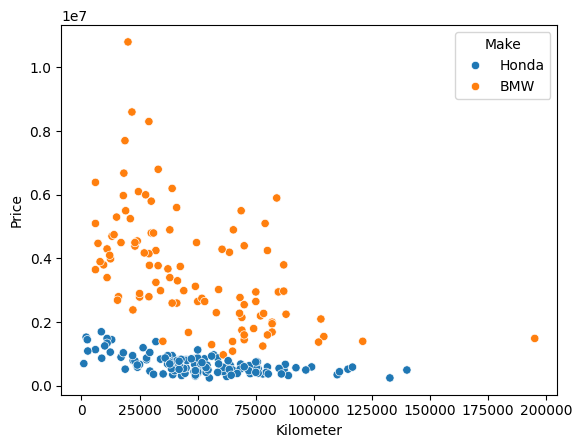

In [4]:
import seaborn as sns
sns.scatterplot(data=df1, x="Kilometer", y="Price", hue="Make")

In [5]:
X1=df1[["Price"]]
y1=df1["Make"]
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.10, random_state=43)
from sklearn.svm import SVC
svc1=SVC(kernel='linear')
svc1.fit(X=X1_train, y=y1_train)
y1_pred=svc1.predict(X1_test)

print("X1 test is ", X1_test.values.ravel())
print("Y1 test is ", ",".join(y1_test))
print("Y1 pred is ", y1_pred)

from sklearn.metrics import classification_report, confusion_matrix
print("SVC BMW vs Honda :: Classification report is ", classification_report(y_true=y1_test, y_pred=y1_pred))
print("SVC BMW vs Honda :: Confusion Matrix is ", confusion_matrix(y_true=y1_test, y_pred=y1_pred))

X1 test is  [ 3900000  5800000  1090000 10800000   785000   445000  1490000  1600000
  4500000  4195000   310000  2600000   570000   540000  1689999   499000
  7700000   351000   505000   550000   695000  1400000   675000   755000]
Y1 test is  BMW,BMW,BMW,BMW,Honda,Honda,BMW,BMW,BMW,BMW,Honda,BMW,Honda,Honda,BMW,Honda,BMW,Honda,Honda,Honda,Honda,BMW,Honda,Honda
Y1 pred is  ['BMW' 'BMW' 'Honda' 'BMW' 'Honda' 'Honda' 'BMW' 'BMW' 'BMW' 'BMW' 'Honda'
 'BMW' 'Honda' 'Honda' 'BMW' 'Honda' 'BMW' 'Honda' 'Honda' 'Honda' 'Honda'
 'BMW' 'Honda' 'Honda']
SVC BMW vs Honda :: Classification report is                precision    recall  f1-score   support

         BMW       1.00      0.92      0.96        12
       Honda       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

SVC BMW vs Honda :: Confusion Matrix is  [[11  1]
 [ 0 12]]


In [6]:
type(y1_test)

pandas.core.series.Series

In [7]:
print(X1_test.values.ravel())

[ 3900000  5800000  1090000 10800000   785000   445000  1490000  1600000
  4500000  4195000   310000  2600000   570000   540000  1689999   499000
  7700000   351000   505000   550000   695000  1400000   675000   755000]


In [8]:
print(",".join(y1_test))

BMW,BMW,BMW,BMW,Honda,Honda,BMW,BMW,BMW,BMW,Honda,BMW,Honda,Honda,BMW,Honda,BMW,Honda,Honda,Honda,Honda,BMW,Honda,Honda


In [9]:
print(df["Make"].value_counts().to_dict())

{'Maruti Suzuki': 440, 'Hyundai': 349, 'Mercedes-Benz': 171, 'Honda': 158, 'Toyota': 132, 'Audi': 127, 'BMW': 121, 'Mahindra': 119, 'Tata': 57, 'Volkswagen': 50, 'Ford': 48, 'Renault': 43, 'Skoda': 40, 'Land Rover': 33, 'Kia': 23, 'Jeep': 18, 'Jaguar': 17, 'MG': 17, 'Nissan': 16, 'Volvo': 16, 'Porsche': 15, 'MINI': 11, 'Datsun': 8, 'Chevrolet': 7, 'Lexus': 6, 'Mitsubishi': 4, 'Ssangyong': 3, 'Rolls-Royce': 3, 'Isuzu': 2, 'Fiat': 2, 'Maserati': 1, 'Ferrari': 1, 'Lamborghini': 1}


In [10]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Age'],
      dtype='object')

<Axes: xlabel='Kilometer', ylabel='Price'>

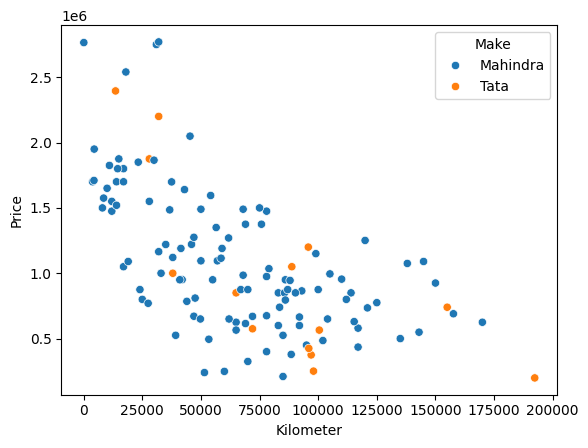

In [11]:
df = pd.read_csv('car_details_v4.csv')
df = df.assign(Age = lambda x: 2025 - x["Year"])
df2 = df[ 
  (df["Year"] > 2010) 
   & (df["Make"].isin(["Mahindra","Tata"])) 
    & (df["Seating Capacity"] != 5)
    #  & (df["Fuel Type"] == "Diesel")
    #   & (df["Owner"] == "First")
    #    & (df["Transmission"] == "Manual")
]
import seaborn as sns
sns.scatterplot(data=df2, x="Kilometer", y="Price", hue="Make")

In [12]:
df2.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
45,Mahindra,Thar CRDe 4x4 AC,625000,2015,65000,Diesel,Manual,Yamunanagar,White,Second,...,2498 cc,105 bhp @ 3800 rpm,247 Nm @ 1800 rpm,AWD,3920.0,1726.0,1930.0,6.0,60.0,10
58,Mahindra,Scorpio SLE BS-IV,400000,2014,78000,Diesel,Manual,Gurgaon,White,Second,...,2179 cc,120 bhp @ 4000 rpm,290 Nm @ 1800 rpm,RWD,4430.0,1817.0,1975.0,8.0,60.0,11
79,Mahindra,Thar LX 4-STR Hard Top Petrol AT,1650000,2022,10000,Petrol,Automatic,Jalandhar,Black,First,...,1997 cc,150 bhp @ 5000 rpm,320 Nm @ 1500 rpm,AWD,3985.0,1820.0,1844.0,4.0,57.0,3
109,Mahindra,Thar LX 4-STR Hard Top Petrol MT,1575000,2021,8519,Petrol,Manual,Mumbai,Blue,First,...,1997 cc,150 bhp @ 5000 rpm,300 Nm @ 1250 rpm,AWD,3985.0,1820.0,1844.0,4.0,57.0,4
149,Mahindra,Marazzo M2 8 STR,1050000,2019,17000,Diesel,Manual,Lucknow,Green,First,...,1497 cc,121 bhp @ 3500 rpm,300 Nm @ 1750 rpm,FWD,4585.0,1866.0,1774.0,8.0,45.0,6


In [13]:
X2=df2[["Price"]]
y2=df2["Make"]
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.10, random_state=43)
from sklearn.svm import SVC
svc2=SVC(kernel='poly')
svc2.fit(X=X2_train, y=y2_train)
y2_pred=svc2.predict(X2_test)

print("X2 test is ", X2_test.values.ravel())
print("Y2 test is ", ",".join(y2_test))
print("Y2 pred is ", y2_pred)

from sklearn.metrics import classification_report, confusion_matrix
print("SVC Mahindra vs Tata :: Classification report is ", classification_report(y_true=y2_test, y_pred=y2_pred))
print("SVC Mahindra vs Tata :: Confusion Matrix is ", confusion_matrix(y_true=y2_test, y_pred=y2_pred))

X2 test is  [ 925000  975000  944999 1475000 1650000 2540000  875000 1864999 1050000
  565000 1035000  665000 1800000]
Y2 test is  Mahindra,Mahindra,Mahindra,Mahindra,Mahindra,Mahindra,Mahindra,Mahindra,Tata,Tata,Mahindra,Mahindra,Mahindra
Y2 pred is  ['Mahindra' 'Mahindra' 'Mahindra' 'Mahindra' 'Mahindra' 'Mahindra'
 'Mahindra' 'Mahindra' 'Mahindra' 'Mahindra' 'Mahindra' 'Mahindra'
 'Mahindra']
SVC Mahindra vs Tata :: Classification report is                precision    recall  f1-score   support

    Mahindra       0.85      1.00      0.92        11
        Tata       0.00      0.00      0.00         2

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13

SVC Mahindra vs Tata :: Confusion Matrix is  [[11  0]
 [ 2  0]]


Fitting 100 folds for each of 25 candidates, totalling 2500 fits
[CV 1/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/100] END ......C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 6/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/100] END ......C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/100] END ......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 10/100] END .....C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 11/100] END .....C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 12/100] END .....C=0.1, gamma=1, kernel=

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,100
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


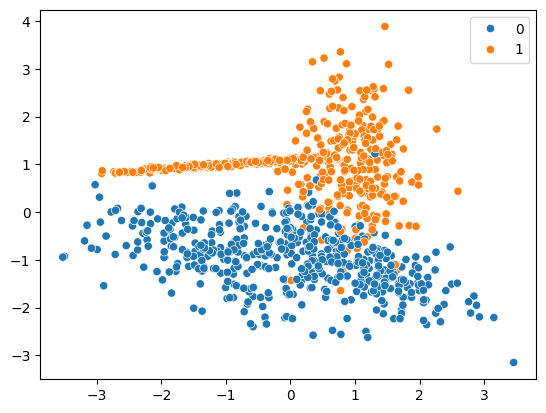

In [37]:
from sklearn.datasets import make_classification
import seaborn as sns


X4,y4=make_classification(n_samples=1000,n_features=2,n_classes=2, n_clusters_per_class=2,n_redundant=0)

sns.scatterplot(
    x=X4[:, 0],   # instead of X4[:,:1]
    y=X4[:, 1],   # instead of X4[:,:2]
    hue=y4
)

from sklearn.model_selection import train_test_split
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.25,random_state=10)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=100,verbose=3)
grid.fit(X4_train,y4_train)

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y2_pred4=grid.predict(X4_test)
print(classification_report(y4_test,y2_pred4))
print(confusion_matrix(y4_test,y2_pred4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       122
           1       0.99      0.96      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[121   1]
 [  5 123]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

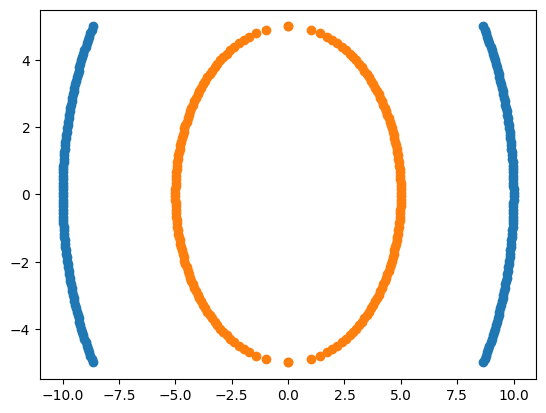

In [13]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [14]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1','X2'])
df2['Y'] = 1

# Use concat instead of append
df = pd.concat([df1, df2], ignore_index=True)

print(df.head(5))

         X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0


In [15]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()


In [16]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [34]:
X4[:,:1]

array([[ 0.10395597],
       [-0.96064706],
       [ 0.59182512],
       [ 1.459774  ],
       [-0.43466596],
       [ 0.04447356],
       [ 1.15371504],
       [-2.52822339],
       [ 1.371427  ],
       [-1.20233816],
       [ 0.58821524],
       [-0.8563018 ],
       [ 0.38392949],
       [-1.13686571],
       [-0.64782944],
       [-0.55025195],
       [ 0.75774017],
       [ 1.22113202],
       [-1.13342587],
       [ 0.65715987],
       [ 0.20298253],
       [-0.20662479],
       [ 1.4055632 ],
       [-1.3232678 ],
       [ 0.95831626],
       [ 0.88366925],
       [-0.76086745],
       [-2.77879762],
       [-0.14267936],
       [ 1.3430159 ],
       [-0.15048062],
       [ 0.12346865],
       [-0.19738809],
       [ 0.53200376],
       [-0.48094995],
       [ 0.55926853],
       [ 0.01801717],
       [ 1.37645667],
       [ 1.81058285],
       [-0.91642471],
       [-1.83115434],
       [-0.89254284],
       [-1.04809554],
       [-1.86366091],
       [ 1.74101144],
       [ 0

In [ ]:
df["Make"].value_counts()

In [ ]:
df["Make"].value_counts()

In [ ]:
df[(df["Make"]=="Mahindra") & (df["Seating Capacity"] == 5)]